## Outlier detection

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.knn import KNN

In [5]:
base = pd.read_csv('../data/credit_data.csv')
base.dropna(inplace= True)
base.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


### 1D outlier detection with boxplot

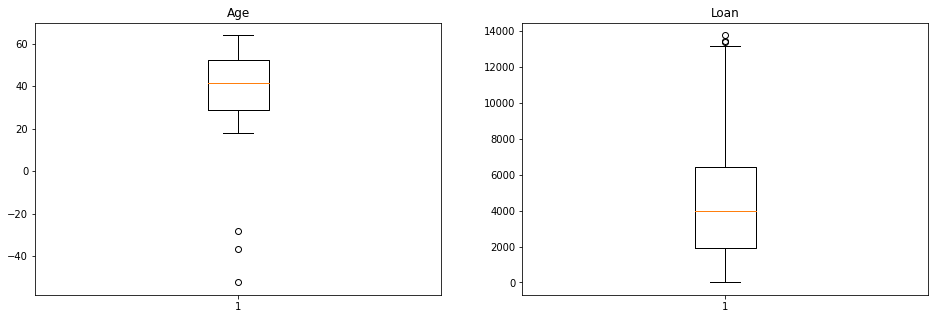

In [14]:
plt.figure(figsize=(16, 5))

# Outliers idade
plt.subplot(121)
plt.boxplot(base.iloc[:, 2]);
plt.title('Age')
outliers_age = base[(base['age'] < -20)]

# Outliers loan
plt.subplot(122)
plt.boxplot(base.iloc[:, 3]);
plt.title('Loan')
outliers_loan = base[(base['loan'] > 13000)]

### 2D outlier detection with scatter

Text(0.5, 1.0, 'Age x Loan')

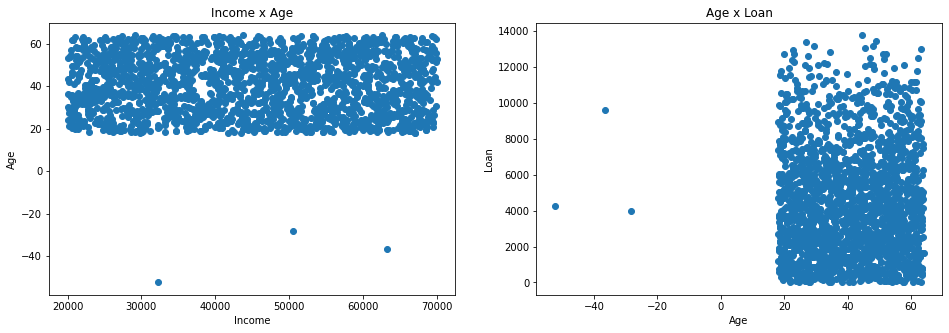

In [18]:
plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.scatter(base.iloc[:, 1], base.iloc[:, 2]);
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Income x Age')

plt.subplot(122)
plt.scatter(base.iloc[:, 2], base.iloc[:, 3]);
plt.xlabel('Age')
plt.ylabel('Loan')
plt.title('Age x Loan')

### Removing the outliers

In [24]:
base[base['age'] < 0] = base['age'].mean()

Text(0.5, 1.0, 'Age x Loan')

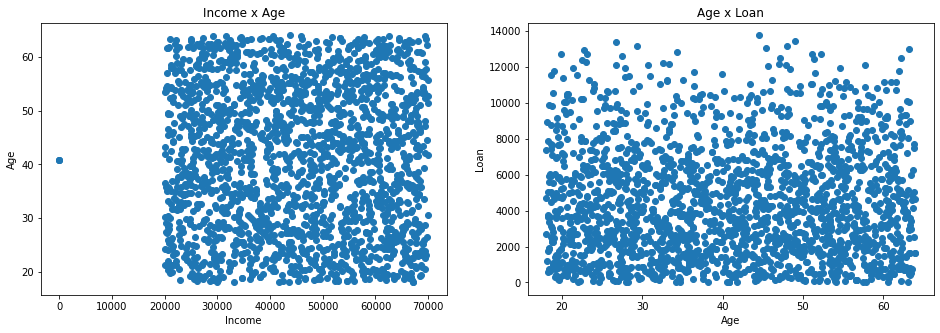

In [25]:
plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.scatter(base.iloc[:, 1], base.iloc[:, 2]);
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('Income x Age')

plt.subplot(122)
plt.scatter(base.iloc[:, 2], base.iloc[:, 3]);
plt.xlabel('Age')
plt.ylabel('Loan')
plt.title('Age x Loan')

### N-dimensional outlier detection with PyOD

A [documentação](https://pyod.readthedocs.io/en/latest/) tem outras opções de algoritmos pra detecção de outlier. Aqui usamos o KNN que é baseado em distância.

In [28]:
detector = KNN()
detector.fit(base.iloc[:, 1:3])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [31]:
previsoes = detector.labels_
confianca_previsoes = detector.decision_scores_

In [33]:
base['outlier'] = previsoes
outliers = base[base['outlier'] == 1]
outliers

,clientid,income,age,loan,default,outlier
3,4.000000,42709.534201,45.751972,6103.642260,0.000000,1
11,12.000000,59436.847123,60.471936,9254.244538,0.000000,1
15,40.807559,40.807559,40.807559,40.807559,40.807559,1
21,40.807559,40.807559,40.807559,40.807559,40.807559,1
23,24.000000,27845.800894,51.970624,4959.921226,0.000000,1
...,...,...,...,...,...,...
1959,1960.000000,38755.162705,56.355427,4244.498033,0.000000,1
1966,1967.000000,21982.017374,34.915516,4265.173704,1.000000,1
1972,1973.000000,52389.366848,54.969313,10398.820592,0.000000,1
1985,1986.000000,22371.522191,39.142225,2291.856428,0.000000,1
